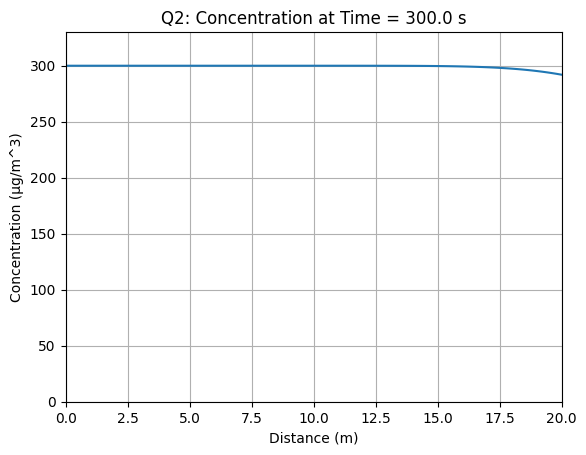

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


end_time = float(input("How long should the model last for, in seconds  "))
time_interval = float(input("The time interval, in seconds   "))
length = float(input("Length of model, in metres   "))
length_interval = float(input("The length interval, in metres   "))
speed = float(input("Speed of river flow, in m/s   "))
initial_concentration = str(input("Name of the .csv file   "))


def concentration_from_csv(end_time, time_interval, length, length_interval, speed, initial_concentration):

    distance = np.array([])
    for i in range(int(length / length_interval + 1)):
        distance = np.append(distance, length_interval * i)


    # encoding uses latin1 to avoid character errors
    df = pd.read_csv(initial_concentration, encoding='latin1')

    # get the data x and c from the file
    x_data = df["Distance (m)"].values
    C_data = df["Concentration (µg/m_ )"].values


    # The concentration beyond the measurement range is set to 0
    initial_conditions = np.interp(distance, x_data, C_data, left=0.0, right=0.0)

    # plotting the graph
    fig, ax = plt.subplots()
    ax.set_xlim(0, length)

    # These set parameters for the axes from 0 to the largest value(from the file) of distance down the river and concentration of pollutants
    max_C0 = np.max(initial_conditions)
    ax.set_ylim(0, max_C0 * 1.1 if max_C0 > 0 else 1.0)
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Concentration (μg/m^3)")


    A_value = 1 / time_interval + speed / length_interval
    B_value = speed / length_interval

    A_array = np.array([])
    B_array = np.array([])
    for i in range(int(length / length_interval + 1)):
        A_array = np.append(A_array, A_value)
        B_array = np.append(B_array, B_value)



    for k in range(int(end_time / time_interval) + 1):
        if  k == 0:
            concentration_to_plot = initial_conditions.copy()
        else:
            concentration_present = np.zeros(int(length / length_interval + 1))
            concentration_present[0] = df.iloc[0,1]

            for i in range(1, int(length / length_interval + 1)):
                concentration_present[i] = (initial_conditions[i] / time_interval+ B_array[i] * concentration_present[i - 1]) / A_array[i]
            initial_conditions = concentration_present.copy()
            concentration_to_plot = initial_conditions.copy()

        ax.clear()
        ax.set_xlim(0, length)
        ax.set_ylim(0, max_C0 * 1.1 if max_C0 > 0 else 1.0)
        ax.set_xlabel("Distance (m)")
        ax.set_ylabel("Concentration (μg/m^3)")
        ax.set_title(f"Q2: Concentration at Time = {k * time_interval} s")
        ax.grid(True)
        ax.plot(distance, concentration_to_plot)

        clear_output(wait=True)
        display(fig)
        plt.pause(0.1)

    plt.close()


concentration_from_csv(
    end_time, time_interval, length, length_interval, speed, initial_concentration)

In [11]:
 # encoding uses latin1 to avoid character errors
df = pd.read_csv("initial_conditions.csv", encoding='latin1')

    # get the data x and c from the file
x_data = df["Distance (m)"].values
C_data = df["Concentration (µg/m_ )"].values
df.iloc[0,1]

np.int64(300)